In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [383]:
data = pd.read_csv("data.csv")

In [384]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

 Unnamed: 32 ve id column kullanmayacağım

In [386]:
data.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)

In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [388]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [390]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis = 1)

* Normalization

In [391]:
# Eger normalize etmessem diğer feature lara üstünlük sağlayabilir. Feature özelliği kaybolabilir.
# Tüm değerler 0 ile 1 arasında olur. 
x = (x_data - np.min(x_data))/np.max(x_data).values

In [392]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.391640,0.017057,0.419151,0.342863,0.402509,0.747597,0.703140,0.731113,0.447039,0.295053,...,0.484184,0.107186,0.534196,0.431077,0.408940,0.603318,0.568610,0.912027,0.457367,0.307759
1,0.483422,0.205193,0.472732,0.472811,0.196512,0.171569,0.203608,0.348757,0.247368,0.068863,...,0.473363,0.229915,0.431489,0.416267,0.236433,0.150577,0.192971,0.639175,0.178518,0.163759
2,0.452117,0.293788,0.457347,0.423631,0.348654,0.406833,0.462512,0.635686,0.331908,0.102935,...,0.433962,0.272709,0.406409,0.358204,0.328976,0.375435,0.359744,0.835052,0.308527,0.156819
3,0.157915,0.271640,0.179257,0.097001,0.550000,0.765837,0.565604,0.522863,0.505592,0.487274,...,0.193674,0.292289,0.192914,0.089915,0.622776,0.793015,0.548642,0.884880,0.764236,0.568482
4,0.473461,0.117872,0.484403,0.461216,0.291738,0.328373,0.463918,0.518390,0.246382,0.091030,...,0.405383,0.093864,0.405215,0.326704,0.297529,0.167968,0.319489,0.558419,0.120368,0.104771


In [393]:
from sklearn.model_selection import train_test_split
# %80 train, %20 test olarak böl derim 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

- Logistic Regression

In [394]:
## initialize Weights And Bias
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
    

## Sigmoid
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head


## Forward propogation
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost


## Fordward backward propogation 
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

## Update (weight ve bias güncellenir)
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


## prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

## Logistic Regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.692422
Cost after iteration 10: 0.512773
Cost after iteration 20: 0.420967
Cost after iteration 30: 0.365600
Cost after iteration 40: 0.328566
Cost after iteration 50: 0.301931
Cost after iteration 60: 0.281743
Cost after iteration 70: 0.265828
Cost after iteration 80: 0.252892
Cost after iteration 90: 0.242121
Cost after iteration 100: 0.232974
Cost after iteration 110: 0.225080
Cost after iteration 120: 0.218174
Cost after iteration 130: 0.212063
Cost after iteration 140: 0.206603
Cost after iteration 150: 0.201682
Cost after iteration 160: 0.197214
Cost after iteration 170: 0.193131
Cost after iteration 180: 0.189379
Cost after iteration 190: 0.185914
Cost after iteration 200: 0.182698
Cost after iteration 210: 0.179703
Cost after iteration 220: 0.176901
Cost after iteration 230: 0.174273
Cost after iteration 240: 0.171800
Cost after iteration 250: 0.169467
Cost after iteration 260: 0.167259
Cost after iteration 270: 0.165166
Cost after iteration 280: 0.163

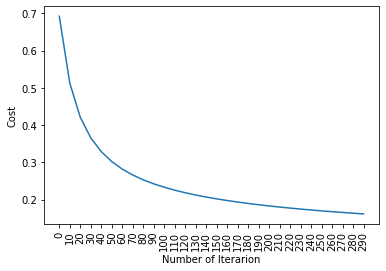

train accuracy: 96.26373626373626 %
test accuracy: 95.6140350877193 %


In [395]:
X_train = x_train.T
X_test = x_test.T
Y_train = y_train.T
Y_test = y_test.T

logistic_regression(X_train, Y_train, X_test, y_test,learning_rate = 1, num_iterations = 300)

In [396]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_head = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)
print(score)

0.956140350877193
